In [1]:
!pip install pandas numpy scikit-learn nltk matplotlib seaborn

In [2]:
!pip install tensorflow keras torch transformers

In [3]:
import pandas as pd

# Load the dataset (update filename if needed)
file_path = "twitter_sentiment.csv"
df = pd.read_csv(file_path)

# Display first few rows
df.tail()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
75676,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
75677,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
75678,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
75679,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.
75680,6960,johnson&johnson,Neutral,Johnson & Johnson to stop selling talc baby po...


In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mitha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mitha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mitha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
# Rename columns to simpler names
df.columns = ['id', 'place', 'feedback', 'text']

# Print new column names
print("Updated Column Names:", df.columns)

# Display first few rows
df.head()

Updated Column Names: Index(['id', 'place', 'feedback', 'text'], dtype='object')


,id,place,feedback,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [6]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mitha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
import nltk
print(nltk.data.path)

['C:\\Users\\mitha/nltk_data', 'C:\\Users\\mitha\\anaconda3\\Anaconda\\nltk_data', 'C:\\Users\\mitha\\anaconda3\\Anaconda\\share\\nltk_data', 'C:\\Users\\mitha\\anaconda3\\Anaconda\\lib\\nltk_data', 'C:\\Users\\mitha\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


In [8]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    if not isinstance(text, str):  # Handle NaN or non-string values
        return ""
    text = text.lower()  # Convert to lowercase
    tokens = word_tokenize(text)  # Tokenization
    tokens = [word for word in tokens if word.isalpha()]  # Remove punctuation
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return " ".join(tokens)

# Apply preprocessing safely
df['text'] = df['text'].astype(str)  # Ensure all values in 'text' column are strings
df['clean_text'] = df['text'].apply(preprocess_text)  

df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mitha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mitha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mitha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,id,place,feedback,text,clean_text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,coming border kill
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting borderland kill
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming borderland murder
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting borderland murder
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting borderland murder


In [9]:
df.tail()

,id,place,feedback,text,clean_text
75676,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...,toronto art culture capital canada wonder want...
75677,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...,actually good move tot bring viewer one people...
75678,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...,today sucked time drink wine n play borderland...
75679,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.,bought fraction microsoft today small win
75680,6960,johnson&johnson,Neutral,Johnson & Johnson to stop selling talc baby po...,johnson johnson stop selling talc baby powder ...


#  Convert Text into Vectors (TF-IDF or CountVectorizer)



In [10]:

from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text to numerical vectors
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])  # Use 'clean_text' for processing

# Use 'feedback' as the target variable
y = df['feedback']  

print(X.shape, y.shape)  # Verify shapes

(75681, 5000) (75681,)


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

C:\Users\mitha\anaconda3\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.6697496201360904
              precision    recall  f1-score   support

  Irrelevant       0.65      0.49      0.56      2615
    Negative       0.72      0.76      0.74      4552
     Neutral       0.61      0.64      0.62      3741
    Positive       0.68      0.70      0.69      4229

    accuracy                           0.67     15137
   macro avg       0.66      0.65      0.65     15137
weighted avg       0.67      0.67      0.67     15137



C:\Users\mitha\anaconda3\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



✨ Model Accuracy: 66.97% ✨

              precision    recall  f1-score   support

  Irrelevant       0.65      0.49      0.56      2615
    Negative       0.72      0.76      0.74      4552
     Neutral       0.61      0.64      0.62      3741
    Positive       0.68      0.70      0.69      4229

    accuracy                           0.67     15137
   macro avg       0.66      0.65      0.65     15137
weighted avg       0.67      0.67      0.67     15137



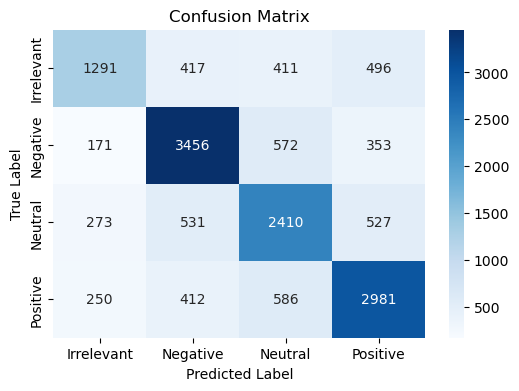

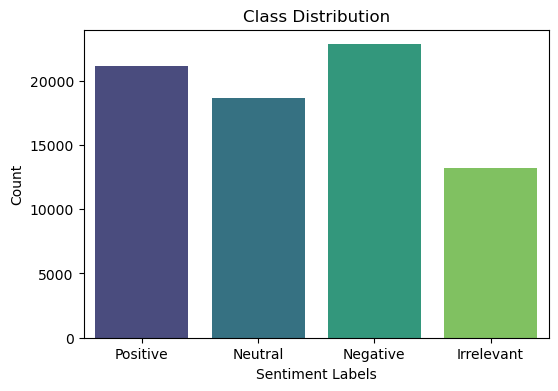

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✨ Model Accuracy: {accuracy:.2%} ✨\n")
print(classification_report(y_test, y_pred))

# 📊 1. Confusion Matrix Visualization
plt.figure(figsize=(6,4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 📊 2. Bar Chart for Class Distribution
plt.figure(figsize=(6,4))
sns.countplot(x=y, palette="viridis")
plt.xlabel("Sentiment Labels")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()


In [13]:
import pickle

# Save the model and vectorizer
with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)

def predict_sentiment(text):
    processed_text = preprocess_text(text)  # Preprocess new text
    vectorized_text = vectorizer.transform([processed_text])  # Convert to vector
    prediction = model.predict(vectorized_text)[0]  # Get prediction
    return prediction

# Example
user_input = "I went to the store to buy some groceries today."
print("Predicted Sentiment:", predict_sentiment(user_input))

Predicted Sentiment: Neutral


In [14]:
user_input = "This product broke after just one day. Very disappointed."
print("Predicted Sentiment:", predict_sentiment(user_input))

Predicted Sentiment: Negative


In [15]:
user_input = "I didn’t expect much, but this turned out to be one of the most exhilarating experiences of my life."
print("Predicted Sentiment:", predict_sentiment(user_input))

Predicted Sentiment: Positive


In [18]:
def predict_sentiment():
    user_input = input("Enter a sentence: ")  
    processed_text = preprocess_text(user_input)  
    vectorized_text = vectorizer.transform([processed_text])  
    prediction = model.predict(vectorized_text)[0]  
    print("Predicted Sentiment:", prediction)

# Run the function
predict_sentiment()

Enter a sentence: It works as described, no major issues so far
Predicted Sentiment: Negative
